In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing

In [2]:
tennis_df = pd.read_csv('C:/Users/kimta/Introduction to Machine Learning/raw_data/PlayTennis.csv')
tennis_df

,Outlook,Temperature,Humidity,Wind,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


# Change Data Types

In [3]:
tennis_df.Play = tennis_df.Play.replace('Yes',1)
tennis_df.Play = tennis_df.Play.replace('No',0)

tennis_df.Outlook = tennis_df.Outlook.replace('Sunny',1)
tennis_df.Outlook = tennis_df.Outlook.replace('Overcast', 2)
tennis_df.Outlook = tennis_df.Outlook.replace('Rain',3)

tennis_df.Temperature = tennis_df.Temperature.replace('Hot',3)
tennis_df.Temperature = tennis_df.Temperature.replace('Mild',2)
tennis_df.Temperature = tennis_df.Temperature.replace('Cool',1)

tennis_df.Humidity = tennis_df.Humidity.replace('High',1)
tennis_df.Humidity = tennis_df.Humidity.replace('Normal',0)

tennis_df.Wind = tennis_df.Wind.replace('Strong',1)
tennis_df.Wind = tennis_df.Wind.replace('Weak',0)

tennis_df


,Outlook,Temperature,Humidity,Wind,Play
0,1,3,1,0,0
1,1,3,1,1,0
2,2,3,1,0,1
3,3,2,1,0,1
4,3,1,0,0,1
5,3,1,0,1,0
6,2,1,0,1,1
7,1,2,1,0,0
8,1,1,0,0,1
9,3,2,0,0,1


# Split (1) feature vs label datasets and (2) train vs test

In [4]:
from sklearn.model_selection import train_test_split

X = tennis_df[['Outlook','Temperature','Humidity','Wind']]
y = tennis_df[['Play']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

# Run a tree-decision ML

In [12]:
dt_clf = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=100)
dt_clf = dt_clf.fit(X_train, y_train)

# Visualizing decision trees

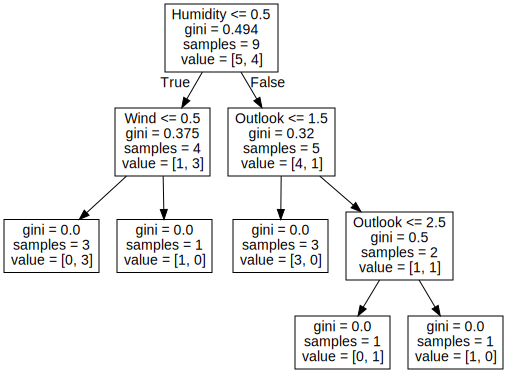

In [13]:
import graphviz
dot_data = tree.export_graphviz(dt_clf, 
                         feature_names=['Outlook','Temperature','Humidity','Wind'],)
graph = graphviz.Source(dot_data)  
graph

# Model Testing

In [9]:
from sklearn.metrics import accuracy_score
dt_prediction = dt_clf.predict(X_test)

In [10]:
print(f"accuracy score is {accuracy_score(y_test, dt_prediction):.3f}")

accuracy score is 0.200


In [14]:
comparison = pd.DataFrame({'prediction':dt_prediction, 'ground_truth':y_test.values.ravel()})
comparison

,prediction,ground_truth
0,0,1
1,0,1
2,1,1
3,0,1
4,0,1


In [15]:
print("Feature importances:", dt_clf.feature_importances_)

Feature importances: [0.36   0.     0.3025 0.3375]


In [16]:
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth':[2,3,4,5,6,7],
    'min_samples_split':[3]
}
grid_cv=GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=3,)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(max_depth=3, random_state=100),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'min_samples_split': [3]},
             scoring='accuracy')

In [17]:
grid_cv.best_score_, grid_cv.best_params_

(0.2222222222222222, {'max_depth': 2, 'min_samples_split': 3})